In [442]:
# 📚 Basic Libraries
import numpy as np 
import pandas as pd
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [443]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [444]:
df_books = pd.read_csv('../data/clean/df_books_clean.csv')
df_books.head(10)

,title,author,first_publish_year,rating,author_encoded
0,The Art of War,孙武,1900,3.95,1
1,The Call of the Wild,Jack London,1903,3.91,22
2,The Hound of the Baskervilles,Arthur Conan Doyle,1900,4.00,24
3,The Great Gatsby,F. Scott Fitzgerald,1920,3.93,9
4,The Mysterious Affair at Styles,Agatha Christie,1920,4.00,85
5,Die Verwandlung,Franz Kafka,1915,5.00,4
6,Five Children and It,Edith Nesbit,1905,5.00,11
7,Kim,Rudyard Kipling,1901,4.00,21
8,The Secret Garden,Frances Hodgson Burnett,1911,4.16,8
9,Anne of Avonlea,Lucy Maud Montgomery,1909,5.00,12


In [445]:
data_features = df_books.drop(columns=["title", "author"]).values

In [446]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)
# data_scaled.to_csv("../data/clean/df_books_scaled.csv", index_label="id")


In [447]:
data_scaled

array([[-2.24776656, -1.19381153, -0.69820003],
       [-2.15435443, -1.27426254,  0.29508205],
       [-2.24776656, -1.09324776,  0.38968034],
       ...,
       [ 0.58573478,  0.91802754, -0.55630259],
       [ 0.11867412,  0.91802754, -0.55630259],
       [ 0.30549838, -1.09324776,  0.2477829 ]], shape=(4245, 3))

In [448]:
df_books["rating"].min()

np.float64(3.51)

In [449]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=1000)
df_books["cluster"] = kmeans.fit_predict(data_scaled)
df_books.to_csv("../data/clean/df_books_cluster.csv", index_label="id")

In [450]:
df_books

,title,author,first_publish_year,rating,author_encoded,cluster
0,The Art of War,孙武,1900,3.95,1,0
1,The Call of the Wild,Jack London,1903,3.91,22,0
2,The Hound of the Baskervilles,Arthur Conan Doyle,1900,4.00,24,0
3,The Great Gatsby,F. Scott Fitzgerald,1920,3.93,9,0
4,The Mysterious Affair at Styles,Agatha Christie,1920,4.00,85,2
...,...,...,...,...,...,...
4240,The Mark,Jerry B. Jenkins,2000,5.00,1,1
4241,Less than angels,Barbara Pym,1955,4.00,4,0
4242,The River,Gary Paulsen,1991,5.00,4,1
4243,"The Letter, the Witch, and the Ring",John Bellairs,1976,5.00,4,1


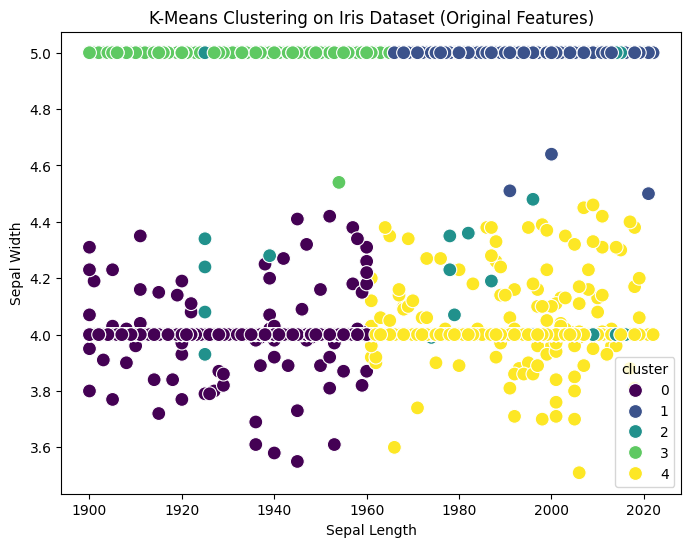

In [451]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_books, x='first_publish_year', y='rating', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering on Iris Dataset (Original Features)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='cluster')
plt.show()

<h2 style="color: #FF6347;">Metrics: Silhouette Score</h2>

In [452]:
from sklearn.metrics import silhouette_score

In [453]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.485


<h2 style="color: #FF6347;">Optimal number of clusters: Elbow method</h2>

In [454]:
inertias = []
range_of_clusters = range(1, 21)

for k in range_of_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(data_scaled)
    inertias.append(model.inertia_)

In [455]:
import plotly.graph_objects as go

In [456]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range_of_clusters), y=inertias, mode='lines+markers', name='Inertia'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis_title='Number of clusters, k',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='array', tickvals=list(range_of_clusters)))
fig.show()

In [457]:
from kneed import KneeLocator

In [458]:
# Finding the optimal number of clusters using the KneeLocator
kn = KneeLocator(range_of_clusters, inertias, curve='convex', direction='decreasing')
optimal_clusters = kn.knee

print(f"Knee method optimal clusters: {optimal_clusters}")

Knee method optimal clusters: 5


In [459]:
def recommend_similar_book(book_name, df):
    cluster_row = df.loc[df['title'] == book_name]
    return df[df["cluster"] == cluster_row.cluster.values[0]].sample(5)  # Return 5 random recommendations


In [460]:
# Get a recommendation for a random book
book_name = "Peter Pan"	  # Choose an index
recommend_similar_book(book_name, df_books)

,title,author,first_publish_year,rating,author_encoded,cluster
2030,"Raise High the Roof Beam, Carpenters; and, Sey...",J. D. Salinger,1959,4.00,4,0
1053,The Cat That Walked by Himself,Rudyard Kipling,1902,4.00,21,0
1608,Silver Wedding / The Lilac Bus,Maeve Binchy,1905,4.00,19,0
116,Of Mice and Men,John Steinbeck,1937,3.89,18,0
1513,The tale of Johnny Town-Mouse,Beatrix Potter,1900,4.00,21,0
